In [1]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot
import numpy as np
import matplotlib.pyplot as plt
import time as clock
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib notebook



In [5]:
def jacobi(A,b,N=25,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = diag(A)
    R = A - diagflat(D)

    # Iterate for N times                                                                                                                                                                          
    for i in range(N):
        x = (b - dot(R,x)) / D
    return x

A = array([[2.0,1.0],[5.0,7.0]])
b = array([11.0,13.0])
guess = array([1.0,1.0])

sol = jacobi(A,b,N=25,x=guess)

print ("A:")
pprint(A)

print ("b:")
pprint(b)

print ("x:")
pprint(sol)

A:
array([[2., 1.],
       [5., 7.]])
b:
array([11., 13.])
x:
array([ 7.11110202, -3.22220342])


In [7]:
# проверить разные схемы
# проверить разные омега оно лежит от 1 до 2 и там уже попробовать построить решения

<IPython.core.display.Javascript object>


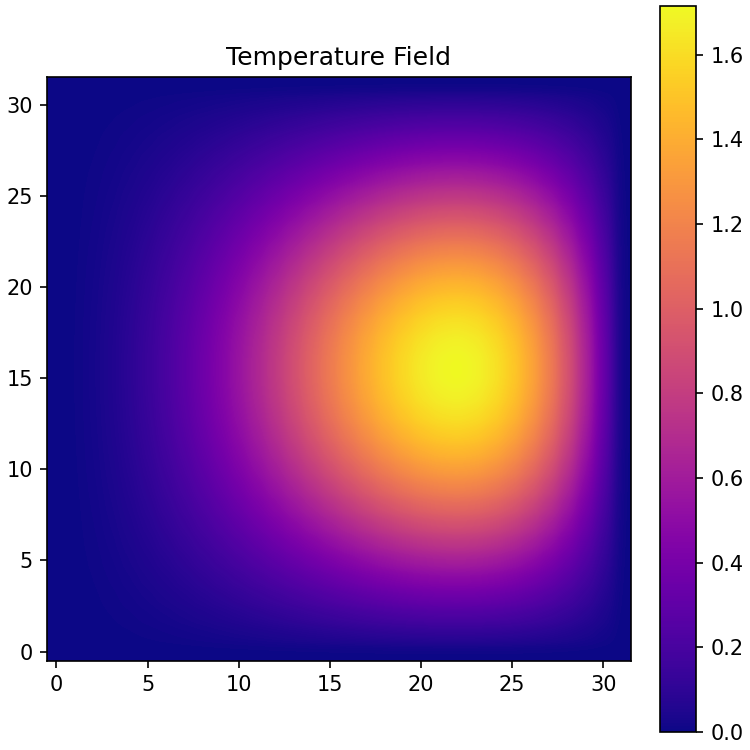

In [108]:
# init

N = 32
u = np.zeros((N, N))
u_1 = np.copy(u)
x_1 = np.linspace(0,np.pi, N)
y_1 = np.copy(x_1)
f = np.copy(u)
func_init = np.zeros((N,N))
func_exact = np.zeros((N,N))


def func(x, y):
    return np.exp(np.sin(x))*(np.cos(x)**2 - np.sin(x))* np.sin(y**2/np.pi) + (np.exp(np.sin(x)) - 1)*((2/np.pi)*np.cos(y**2/np.pi) - 4*y**2/np.pi**2*np.sin(y**2/np.pi))

def func_e(x, y):
    return (np.exp(np.sin(x)) - 1) * np.sin(y**2/np.pi)

def init(Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            
            func_init[i][j] = func(y_1[i], x_1[j])
    return func_init

def exact(Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            
            func_exact[i][j] = func_e(y_1[i], x_1[j])
            
    return func_exact

L= exact(N)
# L=init(N)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
       
p2 = ax.imshow(L, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

fig.colorbar(p2)
ax.set_title('Temperature Field')

fig.canvas.draw()



1500


<IPython.core.display.Javascript object>


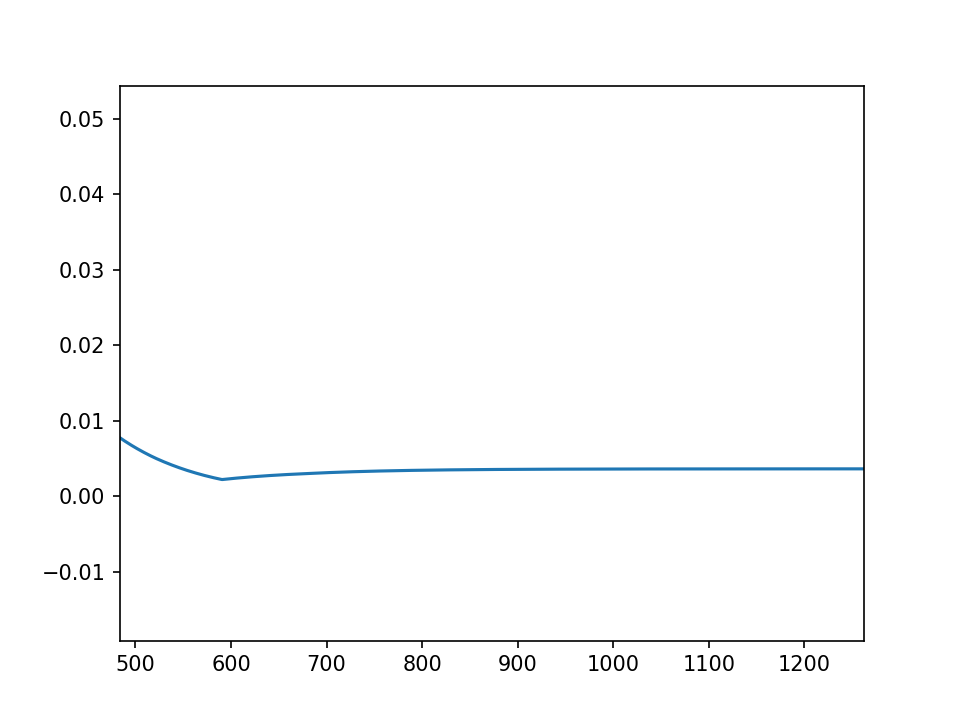

In [110]:



def Jacoby(Nd, Nt):
    err_arr = np.ones(1501)
    k = -1
    e = exact(Nd)
    f = init(Nd)
    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    while min(err_arr)>1e-6 and k != 1500:
        k += 1
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u[j][Nd-1], u[Nd-1][j], u[j][0], u[0][j] = 0, 0, 0, 0
                u[i][j] = -(f[i][j]*h**2 - u[i-1][j] - u[i+1][j] - u[i][j-1]- u[i][j+1])/4
                
        err_arr[k] = np.max(abs(e - u))
    print(k)
    return u, err_arr
    

U, Error = Jacoby(N, 1000)

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

# p2 = ax.imshow(U, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p2)

# fig.canvas.draw()

plt.subplots(1)
plt.plot(Error)

<IPython.core.display.Javascript object>


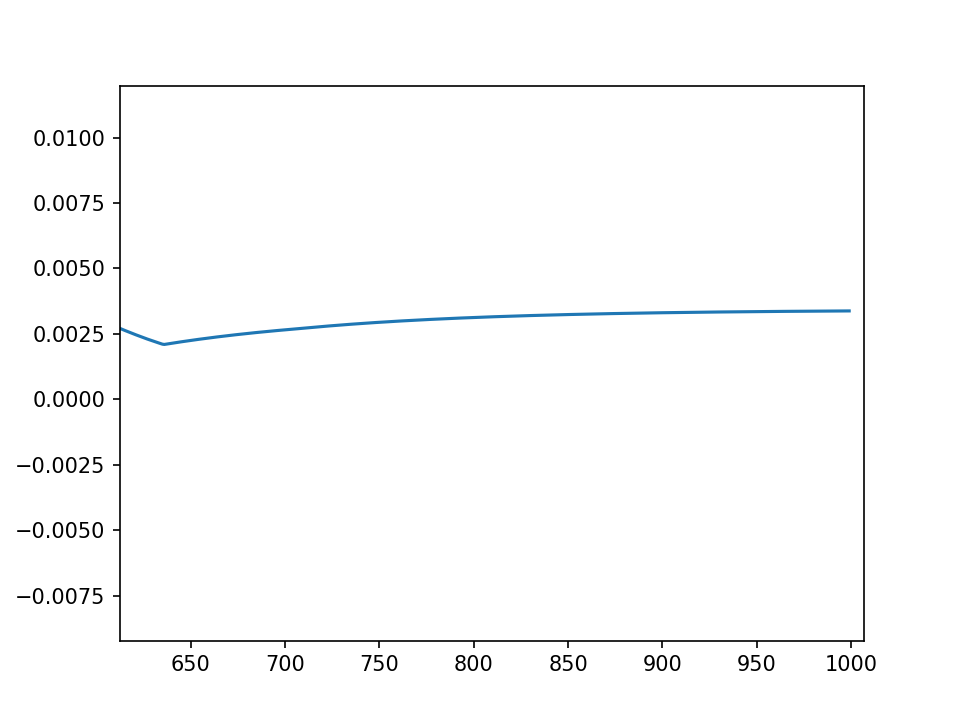

In [84]:
def gauss(Nd, Nt) :  
    err_arr = np.zeros(Nt)
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    u_1 = np.zeros((Nd,Nd))
    for time in range(0, Nt, 1):
        k += 1 
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u_1[i][j] = -(f[i][j]*h**2 - u_1[i-1][j] - u[i+1][j] - u_1[i][j-1]- u[i][j+1])/4
                u = np.copy(u_1)
        err_arr[k] = np.max(abs(e - u_1))
    return u_1, err_arr

U, Error = gauss(N, 1000)

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

# p2 = ax.imshow(U, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p2)

# fig.canvas.draw()

plt.subplots(1)
plt.plot(Error)

In [111]:
N = 50
u = np.zeros((N, N))
u_1 = np.copy(u)
x_1 = np.linspace(0,np.pi, N)
y_1 = np.copy(x_1)
f = np.copy(u)
func_init = np.zeros((N,N))
func_exact = np.zeros((N,N))

<IPython.core.display.Javascript object>


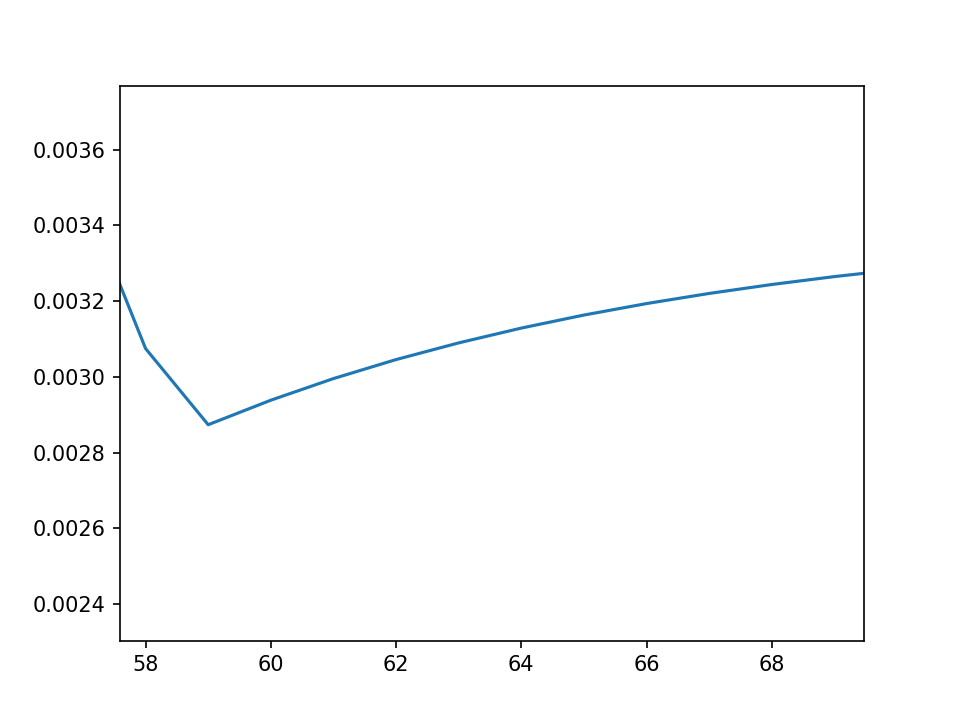

In [83]:

def relax(Nd, Nt):
    err_arr = np.zeros(Nt)
    k = -1
    e = exact(Nd)
    f = init(Nd)
    time = 0
    h = abs(x_1[1] - x_1[2])
    b = 1
    w = 1.805
    u_1 = np.zeros((Nd,Nd))
    for time in range(0, Nt, 1):
        k += 1 
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u_1[:][Nd-1], u_1[Nd-1][:], u_1[:][0], u_1[0][:] = 0, 0, 0, 0
                u_2 = (u_1[i-1][j] + u_1[i+1][j] + b**2*(u_1[i][j-1] + u_1[i][j+1])- f[i][j]*h**2)/(2*(1+b**2))  
                u_1[i][j] = w*u_2 + (1 - w)*u_1[i][j]
        err_arr[k] = np.max(abs(e - u_1))
    return u_1, err_arr
U, Error = relax(N, 500)                
                
# fig, ax = plt.subplots(2, 1, figsize=(5, 5), constrained_layout=True)

# p1 = ax.imshow(U, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p1)

# fig.canvas.draw()

plt.subplots(1)
plt.plot(Error)

In [79]:
U, Error = Jacoby(N, 500)
U1, ErrorG = gauss(N, 500)
U2, ErrorR = relax(N, 500)


<IPython.core.display.Javascript object>


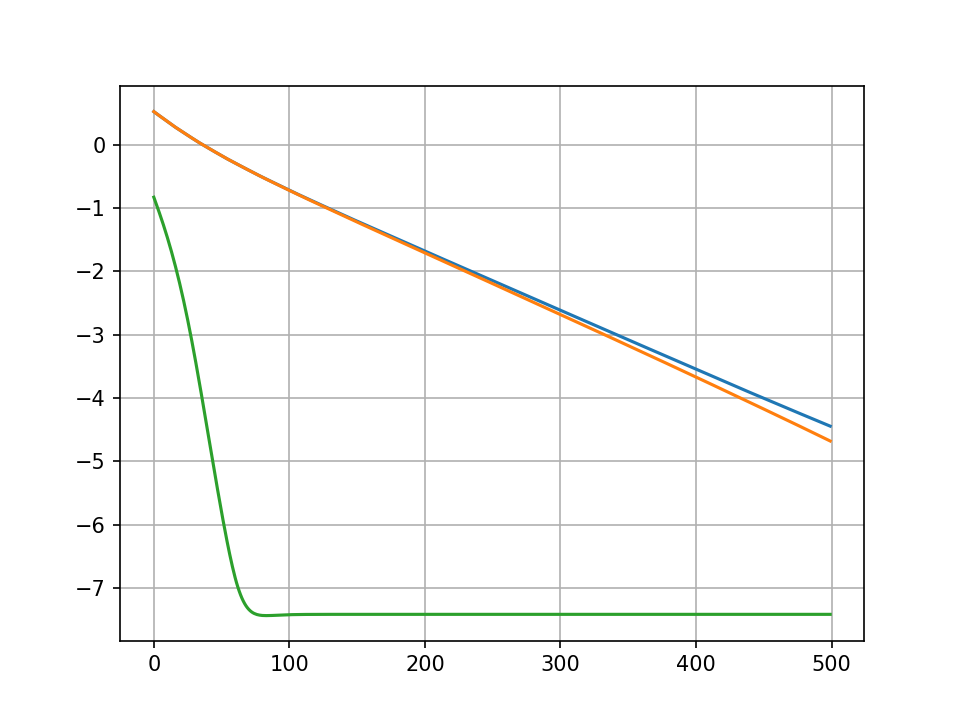

In [80]:
plt.subplots(1)
plt.plot(np.log(Error))
plt.plot(np.log(ErrorG))
plt.plot(np.log(ErrorR))
plt.grid()